<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/mushroom-classification">Classification des Champignons</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignon.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/schéma_champignon.jpg" width="512">
</div>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/73/mushroom">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp, pickle,re
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

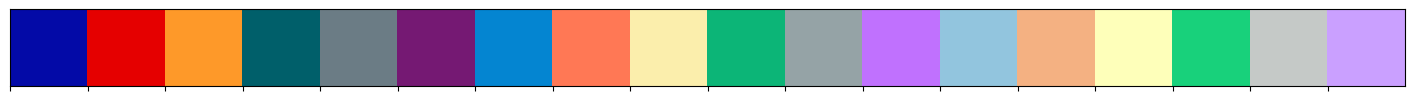

In [4]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram, affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [6]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee,afficheSeparationsBinaires

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='ClassificationDesChampignons-Classification')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
    <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>mushrooms.csv</CAPTION>    
<tr>                                                                                   
     <th>
        <table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>
        <tr>
            <th  style="text-align:left;color:red;font-style: italic">poisonous</th>               
            <th  style="text-align:left;color:red;font-style: italic">edible=e, poisonous=p</th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-shape</th>               
            <th  style="text-align:left">bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-shape.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-surface</th>             
            <th  style="text-align:left">fibrous=f,grooves=g,scaly=y,smooth=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-surface.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-color</th>               
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">bruises</th>                 
            <th  style="text-align:left">bruises=t,no=f</th>
        </tr>    
        <tr>
            <th  style="text-align:left">odor</th>                    
            <th  style="text-align:left">almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-attachment</th>         
            <th  style="text-align:left">attached=a,descending=d,free=f,notched=n<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-attachment.png" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-spacing</th>            
            <th  style="text-align:left">close=c,crowded=w,distant=d<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-spacing.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-size</th>               
            <th  style="text-align:left">broad=b,narrow=n</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-color</th>              
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-shape</th>             
            <th  style="text-align:left">enlarging=e,tapering=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-root</th>              
            <th  style="text-align:left">bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-stalk.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-above-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-below-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-above-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-below-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-type</th>               
            <th  style="text-align:left">partial=p,universal=u</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-color</th>              
            <th  style="text-align:left">brown=n,orange=o,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-number</th>             
            <th  style="text-align:left">none=n,one=o,two=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-type</th>               
            <th  style="text-align:left">cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-ring-type.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">spore-print-color</th>       
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">population</th>              
            <th  style="text-align:left">abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">habitat</th>                 
            <th  style="text-align:left">grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d</th>
        </tr>    
        </table>
     </th>
     <th style="vertical-align: top"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignons_structure.jpeg" width="1024"></th>
 </tr>
</table>



In [9]:
dictValeurs = {}
dictValeurs['cible']                   ={'comestible':'e','toxique':'p'} 
dictValeurs['cap_shape']               ={'bell':'b','conical':'c','convex':'x','flat':'f','knobbed':'k','sunken':'s'}
dictValeurs['cap_surface']             ={'fibrous':'f','grooves':'g','scaly':'y','smooth':'s'}
dictValeurs['cap_color']               ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','green':'r','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['bruises']                 ={'bruises':'t','no':'f'}
dictValeurs['odor']                    ={'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f','musty':'m','none':'n','pungent':'p','spicy':'s'}
dictValeurs['gill_attachment']         ={'attached':'a','descending':'d','free':'f','notched':'n'}
dictValeurs['gill_spacing']            ={'close':'c','crowded':'w','distant':'d'}
dictValeurs['gill_size']               ={'broad':'b','narrow':'n'}
dictValeurs['gill_color']              ={'black':'k','brown':'n','buff':'b','chocolate':'h','gray':'g','green':'r','orange':'o','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_shape']             ={'enlarging':'e','tapering':'t'}
dictValeurs['stalk_root']              ={'bulbous':'b','club':'c','cup':'u','equal':'e','rhizomorphs':'z','rooted':'r','missing':'?'}
dictValeurs['stalk_surface_above_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_surface_below_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_color_above_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_color_below_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['veil_type']               ={'partial':'p','universal':'u'}
dictValeurs['veil_color']              ={'brown':'n','orange':'o','white':'w','yellow':'y'}
dictValeurs['ring_number']             ={'none':'n','one':'o','two':'t'}
dictValeurs['ring_type']               ={'cobwebby':'c','evanescent':'e','flaring':'f','large':'l','none':'n','pendant':'p','sheathing':'s','zone':'z'}
dictValeurs['spore_print_color']       ={'black':'k','brown':'n','buff':'b','chocolate':'h','green':'r','orange':'o','purple':'u','white':'w','yellow':'y'}
dictValeurs['population']              ={'abundant':'a','clustered':'c','numerous':'n','scattered':'s','several':'v','solitary':'y'}
dictValeurs['habitat']                 ={'grasses':'g','leaves':'l','meadows':'m','paths':'p','urban':'u','waste':'w','woods':'d'}

def reverseDict(dictValeurs, dictRValeurs, dictNValeurs):
    for colonne in dictValeurs:
        dictRValeurs[colonne] =  { dictValeurs[colonne][cle]:cle for cle in dictValeurs[colonne]}
        dictNValeurs[colonne] =  { cle:i for i,cle in enumerate(dictValeurs[colonne])}

dictRValeurs,dictNValeurs = {},{}
reverseDict(dictValeurs, dictRValeurs, dictNValeurs)

In [10]:
donnees = pd.read_csv('../donnees/Champignons/mushrooms.csv')
donnees.columns = ['cible']+[colonne.replace('-','_') for colonne in  donnees.columns[1:]]

In [11]:
for colonne in donnees.columns:
    donnees[colonne] = donnees[colonne].apply( lambda x : dictRValeurs[colonne][x])

In [12]:
donnees.sample(5)

,cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
4203,toxique,convex,smooth,gray,bruises,foul,free,close,broad,white,...,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,urban
4641,toxique,flat,smooth,white,bruises,foul,free,close,broad,white,...,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,urban
806,comestible,bell,scaly,white,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,grasses
6937,comestible,convex,fibrous,white,no,none,free,crowded,broad,pink,...,smooth,white,white,partial,white,two,pendant,white,scattered,grasses
4231,toxique,convex,scaly,yellow,no,foul,free,close,broad,pink,...,silky,pink,pink,partial,white,one,large,chocolate,solitary,paths


In [13]:
for col in donnees.columns:
    print(f'{col:26s} {donnees[col].sort_values().nunique():4d} {donnees[col].sort_values().unique()}')

cible                         2 ['comestible' 'toxique']
cap_shape                     6 ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken']
cap_surface                   4 ['fibrous' 'grooves' 'scaly' 'smooth']
cap_color                    10 ['brown' 'buff' 'cinnamon' 'gray' 'green' 'pink' 'purple' 'red' 'white'
 'yellow']
bruises                       2 ['bruises' 'no']
odor                          9 ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy']
gill_attachment               2 ['attached' 'free']
gill_spacing                  2 ['close' 'crowded']
gill_size                     2 ['broad' 'narrow']
gill_color                   12 ['black' 'brown' 'buff' 'chocolate' 'gray' 'green' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow']
stalk_shape                   2 ['enlarging' 'tapering']
stalk_root                    5 ['bulbous' 'club' 'equal' 'missing' 'rooted']
stalk_surface_above_ring      4 ['fibrous' 'scaly' 'silky' 'smooth']
stalk_surface_below

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Effacement d'une variable inutile</div></b>

In [14]:
donnees['veil_type'].describe()

count        8124
unique          1
top       partial
freq         8124
Name: veil_type, dtype: object

In [15]:
donnees['veil_type'].unique()

array(['partial'], dtype=object)

In [16]:
donnees.drop(columns='veil_type',inplace=True)

In [17]:
donnees.sample(5)

,cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
2250,comestible,convex,scaly,gray,bruises,none,free,close,broad,purple,...,smooth,smooth,gray,gray,white,one,pendant,brown,solitary,woods
5986,toxique,flat,scaly,yellow,no,foul,free,close,broad,gray,...,silky,silky,buff,buff,white,one,large,chocolate,several,grasses
290,comestible,convex,fibrous,gray,no,none,free,close,narrow,gray,...,smooth,smooth,white,white,white,one,pendant,black,solitary,urban
4847,toxique,convex,scaly,yellow,no,foul,free,close,broad,chocolate,...,silky,silky,brown,buff,white,one,large,chocolate,solitary,paths
4214,toxique,convex,fibrous,yellow,no,foul,free,close,broad,gray,...,silky,silky,buff,pink,white,one,large,chocolate,solitary,grasses


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Variables qualitatives</div></b>

In [18]:
qualitatives = donnees.columns[1:]
cible = 'cible'

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">


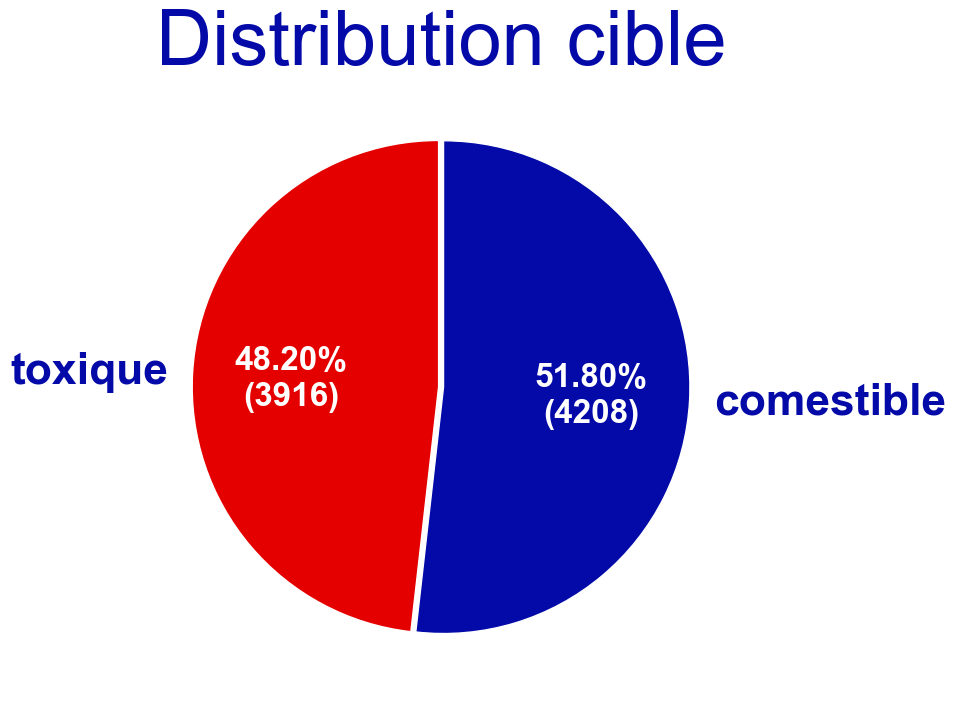

In [19]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.groupby(cible).cap_shape.count().reset_index().rename(columns={'cap_shape':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage['cible'].values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage['cible'].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonInitial.png" width="800">

In [20]:
X = donnees[qualitatives].copy()
for colonne in X.columns:
    X[colonne] = X[colonne].apply(lambda x : dictNValeurs[colonne][x])
    
y = donnees[cible].apply(lambda x : dictNValeurs[cible][x])

In [21]:
donneesXy = X.copy()
donneesXy[cible] = y.copy()

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

In [22]:
X_traitement, X_validation, y_traitement, y_validation = train_test_split( X, 
                                                               y, 
                                                               test_size=1024, 
                                                               random_state=0, 
                                                               stratify = y
                                                               ) 
donneesXy.loc[X_validation.index ,'échantillon'] = 'validation'

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X_traitement, 
                                                     y_traitement, 
                                                     test_size=1024, 
                                                     random_state=0, 
                                                     stratify = y_traitement
                                                   ) 
donneesXy.loc[X_train.index,'échantillon'] = 'apprentissage'
donneesXy.loc[X_test.index ,'échantillon'] = 'test'

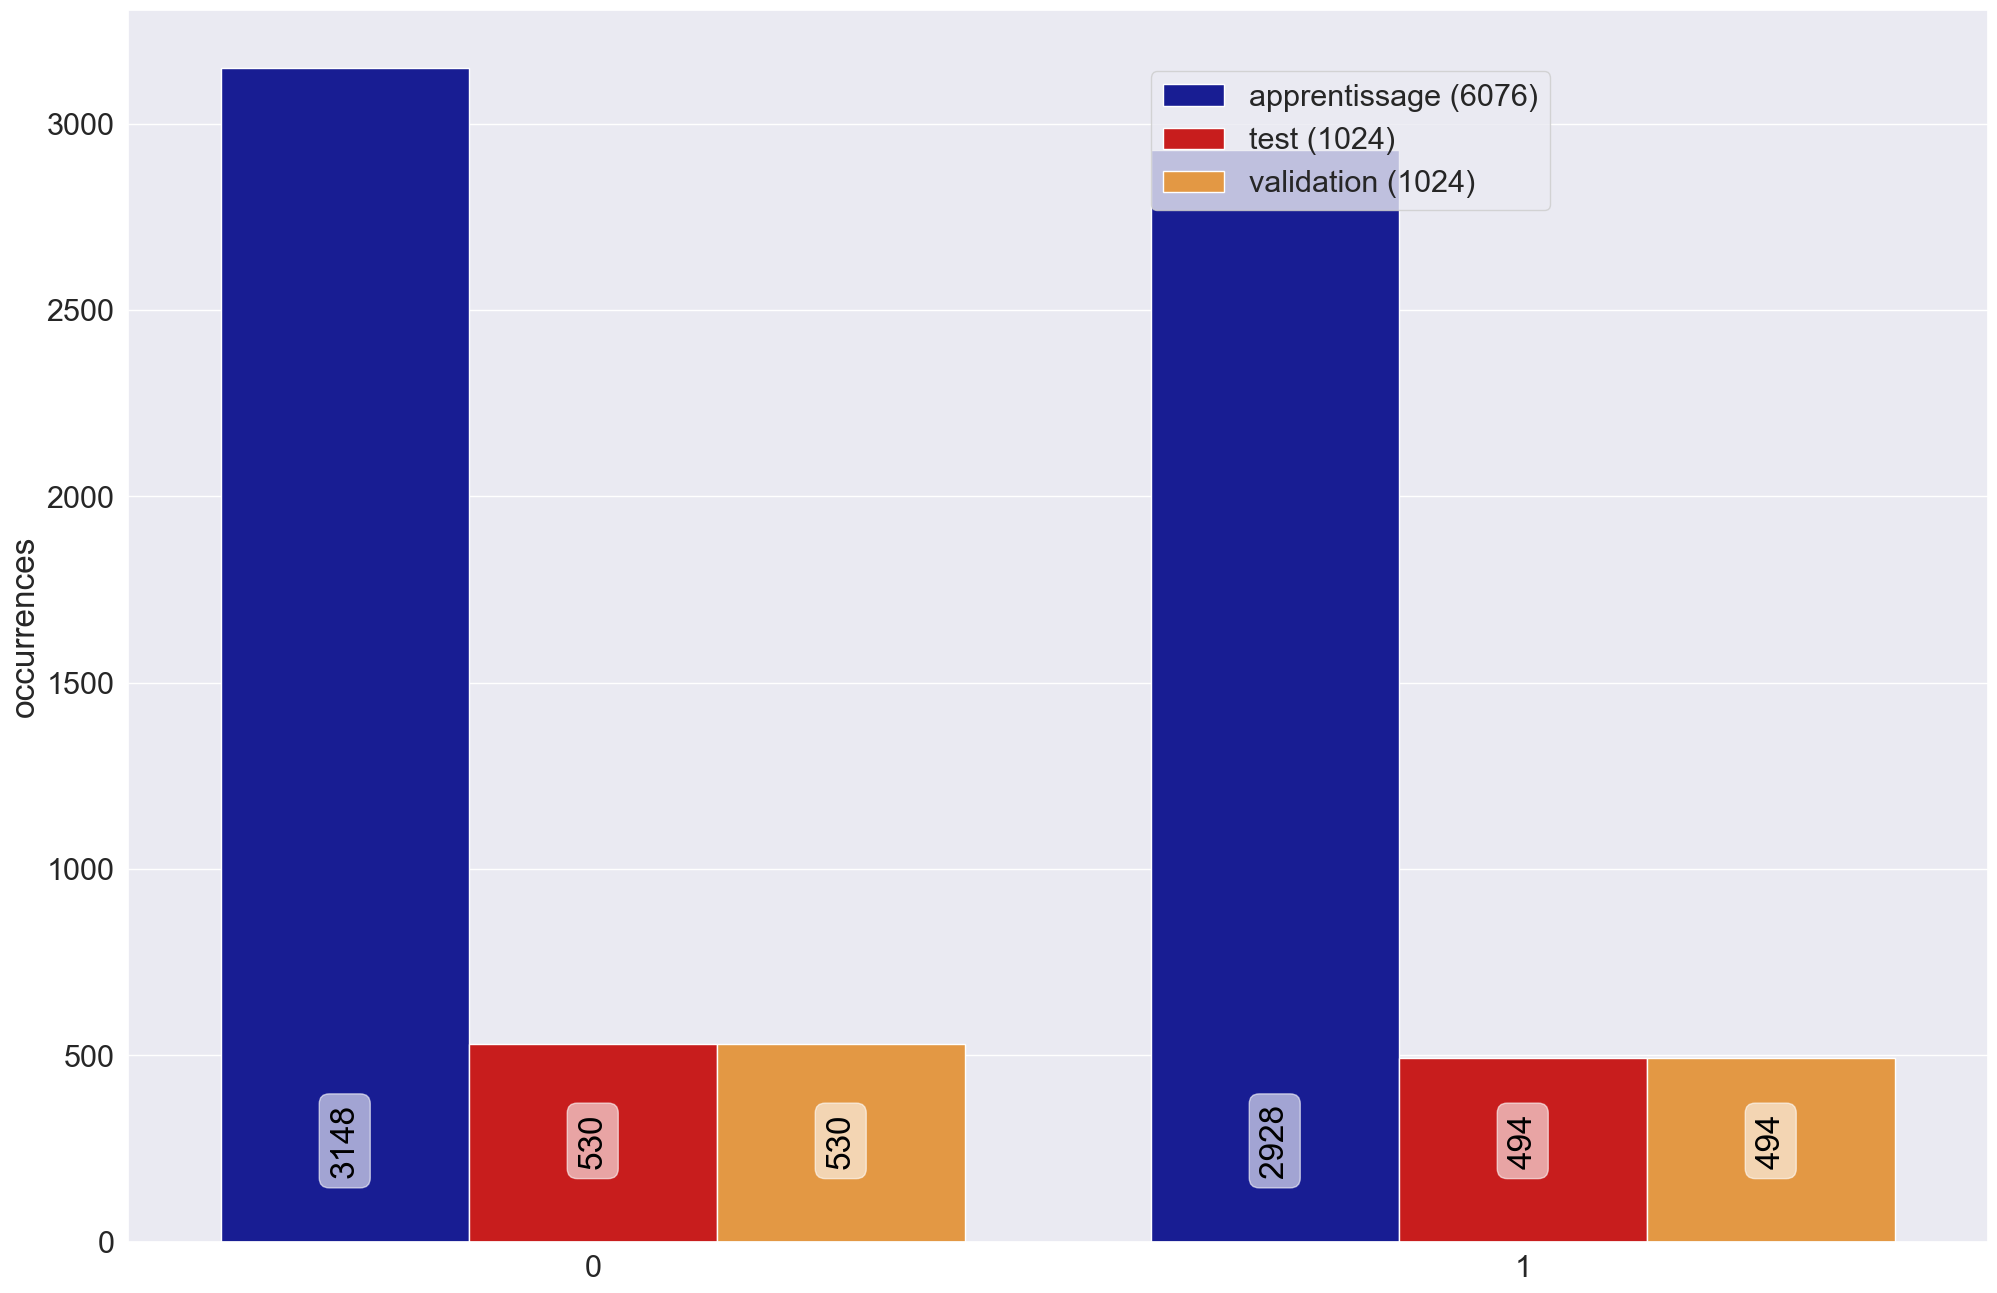

In [24]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(24,16))
afficheSeparationsBinaires(donneesXy, palette, ax, cible=cible)

In [25]:
donneesXy.reset_index(inplace=True)
donneesXy.set_index(['échantillon','index'],inplace=True)
donneesXy.to_parquet(os.path.join(projet.repertoireDonnees,'donneesXy.parquet'))

In [26]:
donneesXy.sample(10)

cap_shape  cap_surface  cap_color  bruises  odor  \
échantillon   index                                                     
apprentissage 3022           3            0          7        0     6   
              7288           4            2          0        1     3   
              4787           3            0          9        1     4   
validation    1123           2            0          0        0     6   
apprentissage 1714           3            0          8        1     6   
              3419           3            2          7        0     6   
              1951           2            2          7        0     6   
              2055           3            0          8        1     6   
              92             2            2          9        0     0   
              5080           2            2          9        1     4   

                     gill_attachment  gill_spacing  gill_size  gill_color  \
échantillon   index                                                         
apprentissage 3022                 2             0          0          10   
              7288                 2             0          1           2   
              4787                 2             0          0           7   
validation    1123                 2             0          0           7   
apprentissage 1714                 2             1          0           7   
              3419                 2             0          0          10   
              1951                 2             0          0           8   
              2055                 2             1          0           0   
              92                   2             0          0           4   
              5080                 2             0          0           7   

                     stalk_shape  ...  stalk_surface_below_ring  \
échantillon   index               ...                             
apprentissage 3022             1  ...                         3   
              7288             1  ...                         3   
              4787             0  ...                         2   
validation    1123             1  ...                         3   
apprentissage 1714             1  ...                         0   
              3419             1  ...                         3   
              1951             1  ...                         3   
              2055             1  ...                         0   
              92               0  ...                         3   
              5080             0  ...                         2   

                     stalk_color_above_ring  stalk_color_below_ring  \
échantillon   index                                                   
apprentissage 3022                        3                       3   
              7288                        5                       7   
              4787                        1                       5   
validation    1123                        5                       5   
apprentissage 1714                        7                       7   
              3419                        3                       3   
              1951                        5                       5   
              2055                        7                       7   
              92                          7                       7   
              5080                        0                       1   

                     veil_color  ring_number  ring_type  spore_print_color  \
échantillon   index                                                          
apprentissage 3022            2            1          5                  1   
              7288            2            1          1                  7   
              4787            2            1          3                  3   
validation    1123            2            1          5                  0   
apprentissage 1714            2            1          1                  1   
              3

In [27]:
X_train, X_test, y_train, y_test = donneesXy.loc[('apprentissage'),qualitatives],\
                                   donneesXy.loc[('test'),qualitatives],\
                                   donneesXy.loc[('apprentissage'),cible],\
                                   donneesXy.loc[('test'),cible] 

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classifieurs </div></b>

In [28]:
classificateursDict =  initDictionnaireClassificateurs(arbres=12)
classificateursDict.pop('LightGBM')
# classificateursDict.pop('XGBoost')
# classificateursDict.pop('Stochastic_GD')

LGBMClassifier(min_child_samples=10, min_split_gain=0.01, n_estimators=12,
               num_leaves=20, reg_alpha=0.1, reg_lambda=20)

In [29]:
classificateursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=12, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=12),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='auc', feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=12, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LogisticRegression': Logist

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

AdaBoost               0.9785	--	Area under the ROC curve : 0.9982	--	Exécution  :.09s
GaussianNaiveBayes     0.8740	--	Area under the ROC curve : 0.9278	--	Exécution  :.03s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :29.86s
 0.9805	--	Area under the ROC curve : 0.9901	--	Exécution  :18.79s
 0.9570	--	Area under the ROC curve : 0.9901	--	Exécution  :2.34s
Nearest_Neighbors      1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.16s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :2.80s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :1.81s
QuadraticDiscriminant  0.9990	--	Area under the ROC curve : 0.9988	--	Exécution  :.03s
 0.9990	--	Area under the ROC curve : 1.0000	--	Exécution  :15.64s
Random_Forest          1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.13s
Stochastic_GD          0.9268	--	Area under the ROC curve : 0.9802	--	Exécution  :.04s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.21s


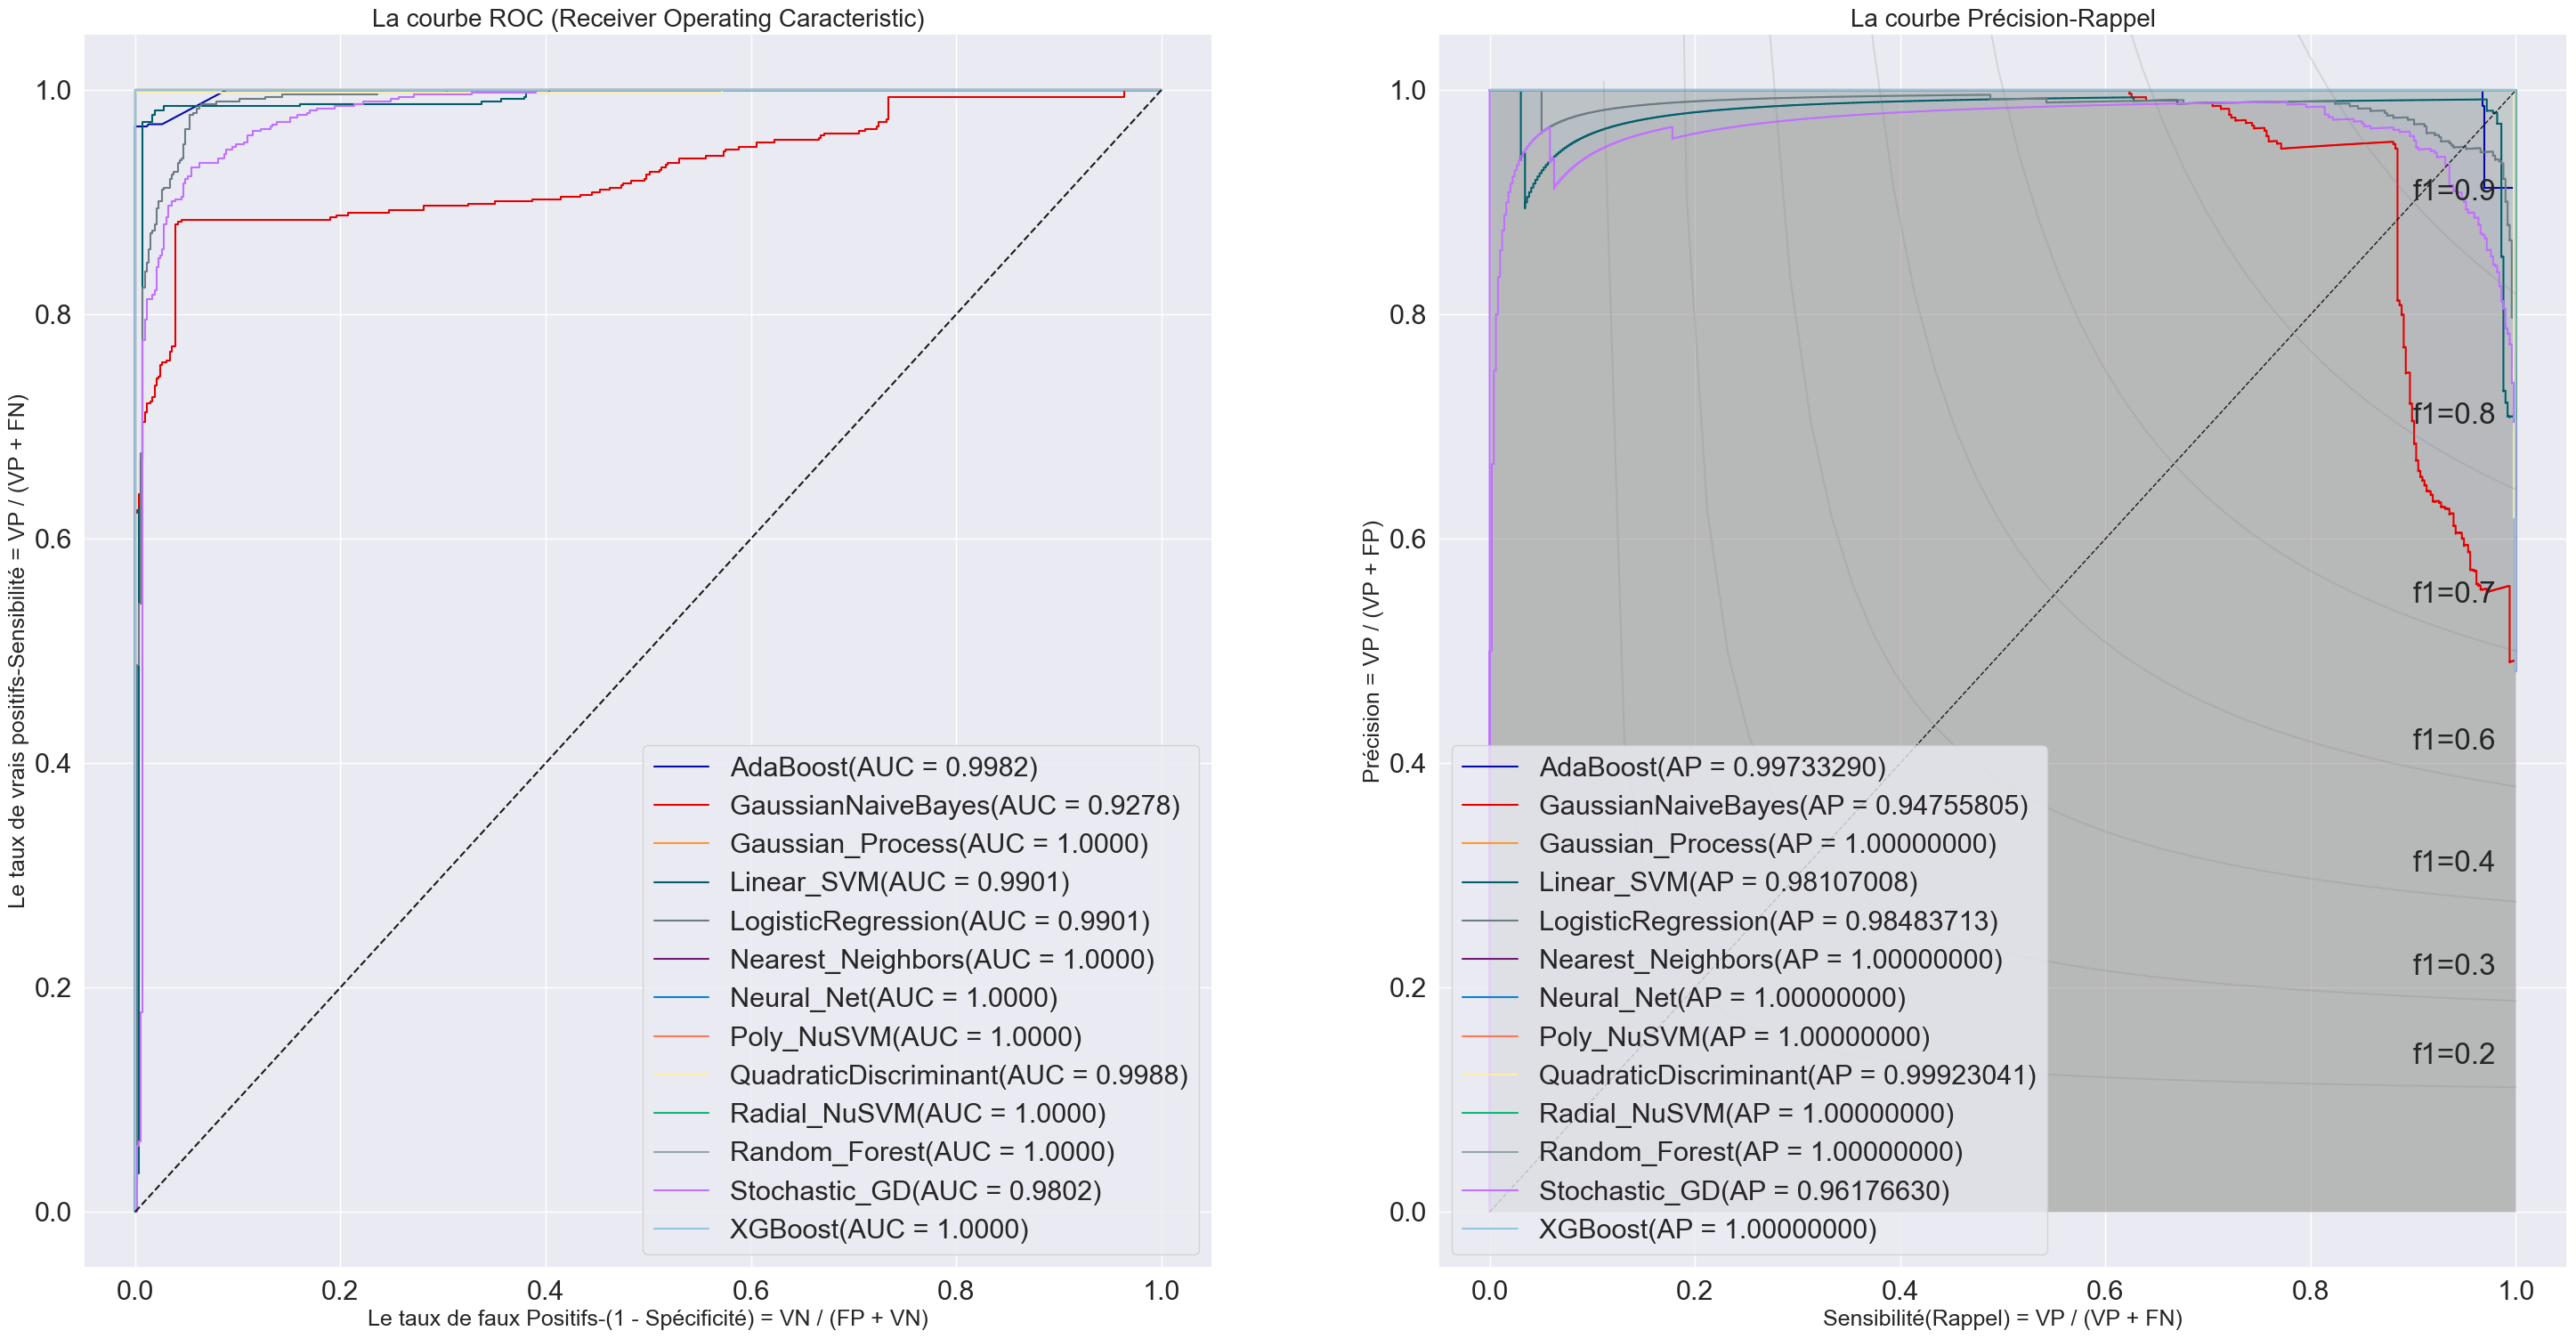

Exécution  :74.22s


In [30]:
resultats = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette[:len(classificateursDict.keys())],
                                                     nom_essai = 'Initial', 
                                                     projet=projet)

In [31]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(10)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
Gaussian_Process,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Nearest_Neighbors,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Neural_Net,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Poly_NuSVM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Random_Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Radial_NuSVM,1.000000,1.000000,0.999023,0.998987,1.000000,0.997976,1.000000,3.519888e-02,0.000977,0.997976,Initial
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
QuadraticDiscriminant,0.998843,0.999230,0.999023,0.998987,1.000000,0.997976,1.000000,3.519888e-02,0.000977,0.997976,Initial
AdaBoost,0.998228,0.997333,0.978516,0.977505,0.987603,0.967611,0.988679,7.743754e-01,0.021484,0.956000,Initial


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Transformation des modalités en variables</div></b> 

In [32]:
def createColumnsQualitatives(donnees,col):
    valeurs = donnees[col].sort_values().unique()
    for i in valeurs : 
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

In [33]:
for colonne in donneesXy.drop(columns=cible).columns:
    createColumnsQualitatives(donneesXy,colonne)    

In [34]:
X_train, X_test, y_train, y_test = donneesXy.loc[('apprentissage'),:].drop(columns=cible),\
                                   donneesXy.loc[('test'),:].drop(columns=cible),\
                                   donneesXy.loc[('apprentissage'),cible],\
                                   donneesXy.loc[('test'),cible] 

AdaBoost               0.9736	--	Area under the ROC curve : 0.9985	--	Exécution  :.17s
 0.9697	--	Area under the ROC curve : 0.9962	--	Exécution  :.05s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :37.34s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.61s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :1.66s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.51s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :2.07s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :3.39s
QuadraticDiscriminant  1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.07s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :24.95s
Random_Forest          0.9619	--	Area under the ROC curve : 0.9993	--	Exécution  :.14s
 0.9814	--	Area under the ROC curve : 0.9990	--	Exécution  :.06s
 1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.33s


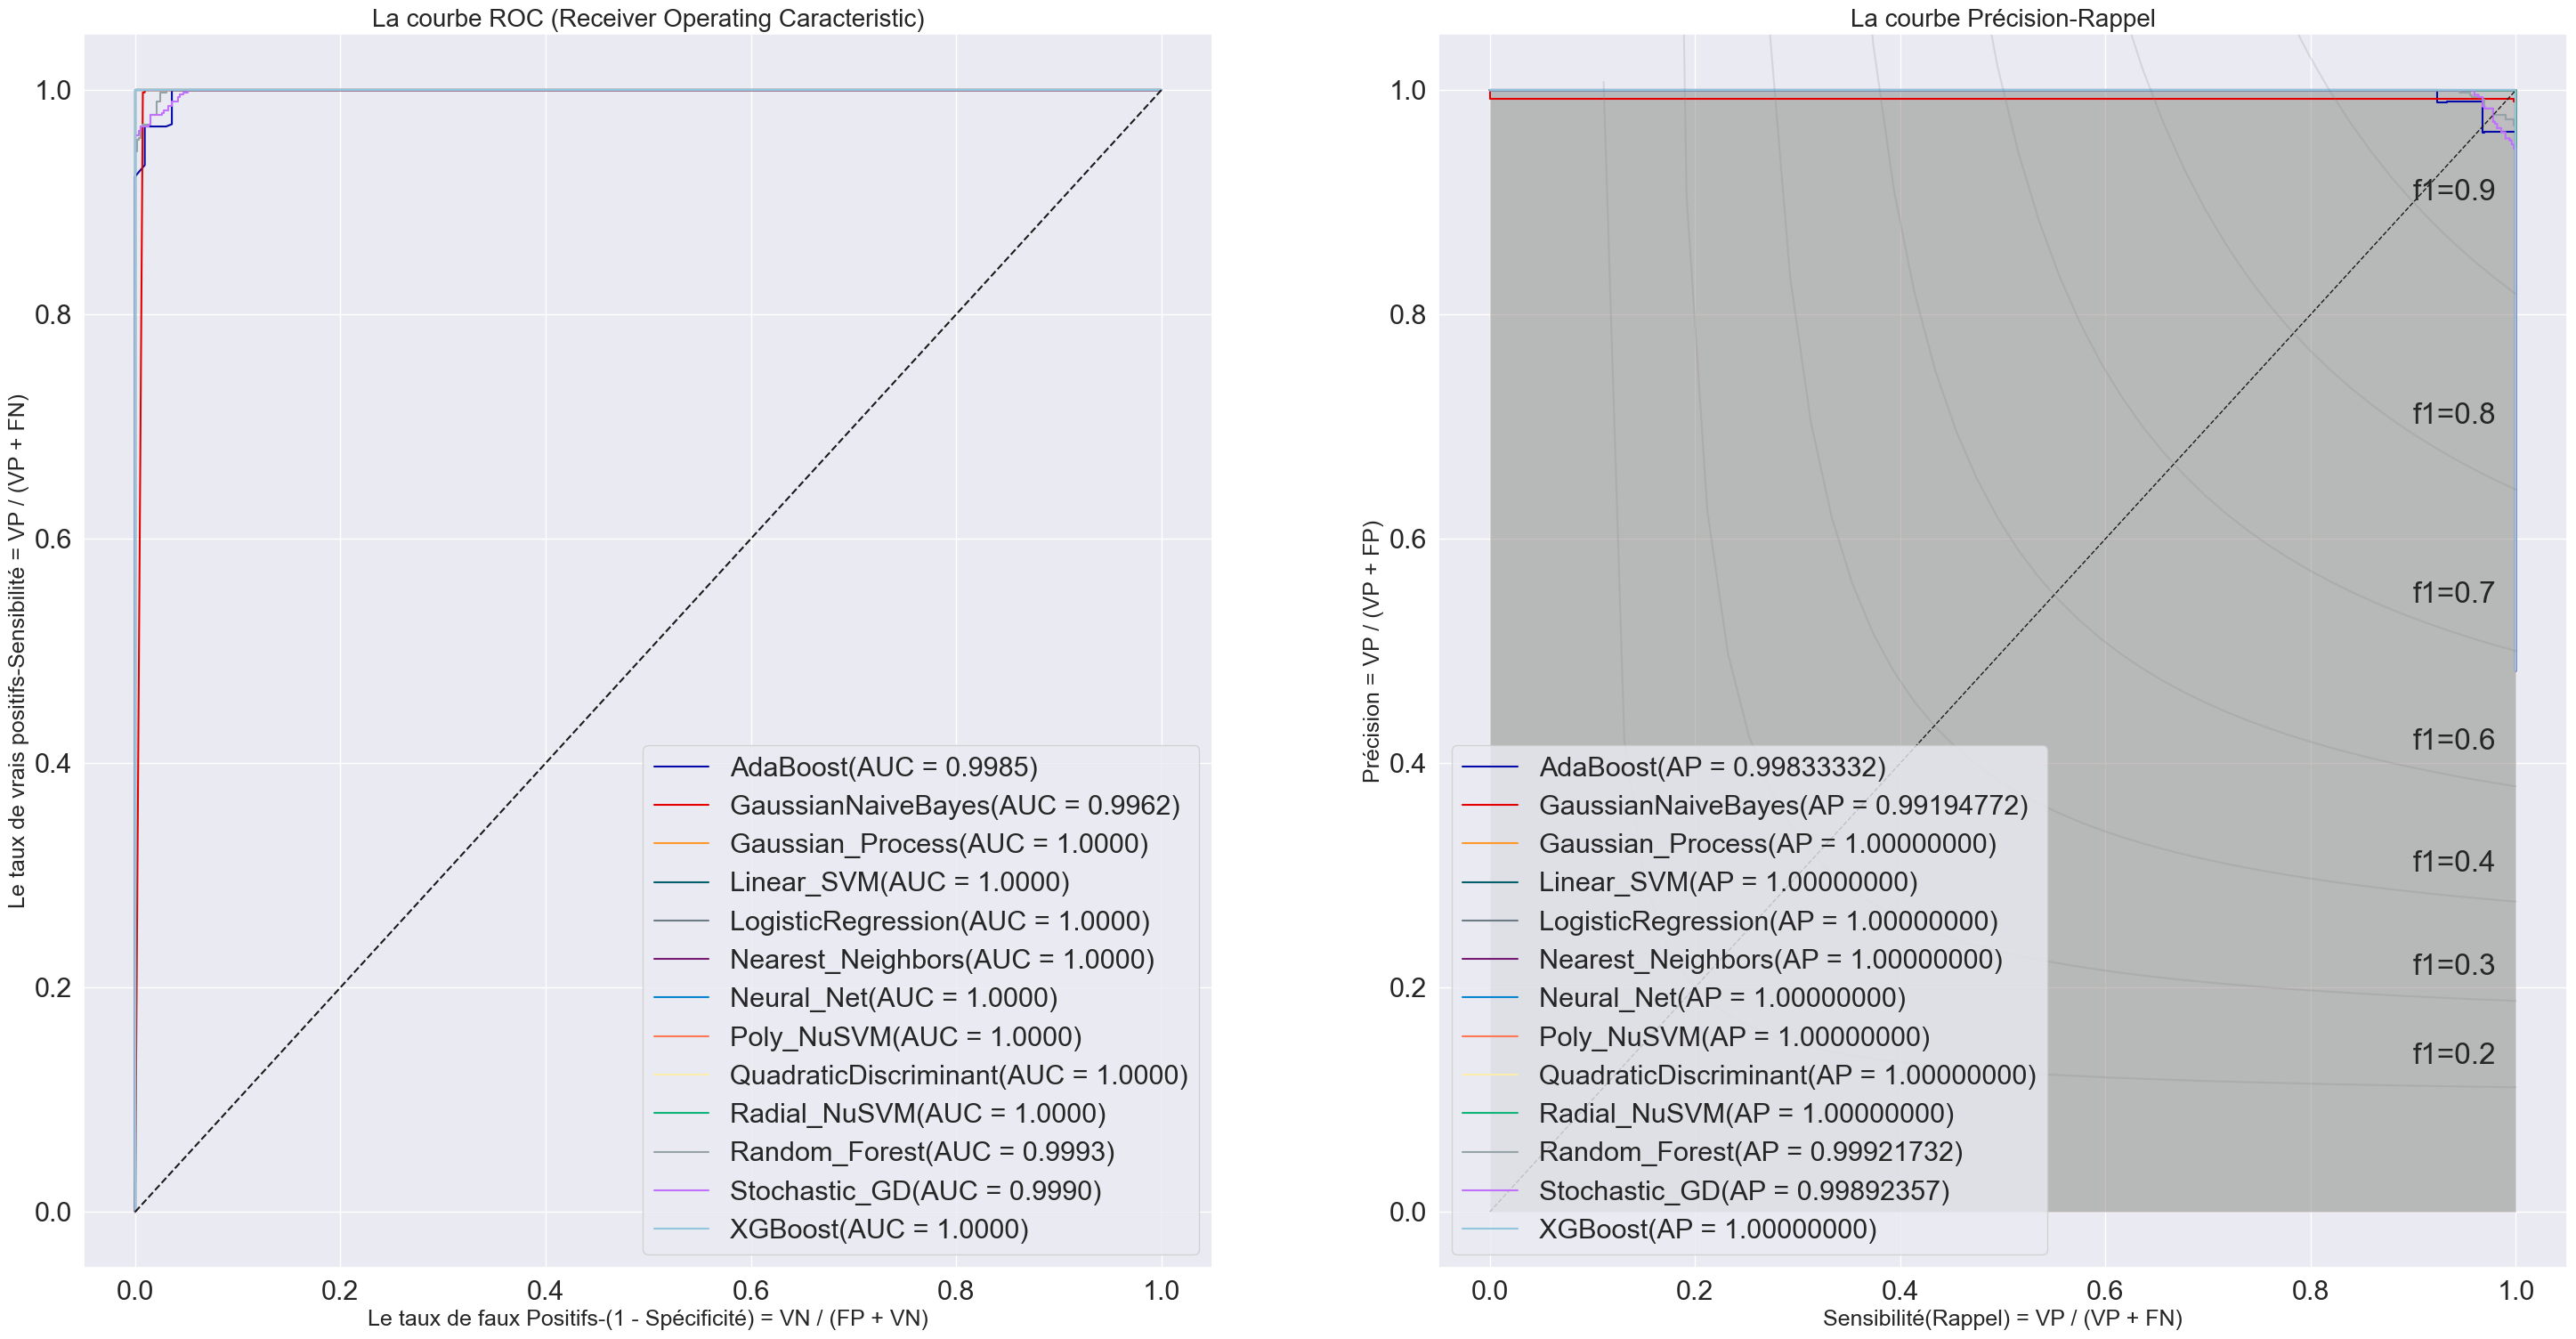

Exécution  :73.69s


In [35]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette[:len(classificateursDict.keys())],
                                                     nom_essai = 'Modalités', 
                                                     projet=projet)

In [36]:
resultats = pd.concat([resultats,resultatsTemp])

In [37]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('aucROC',ascending=False).head(20)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
Gaussian_Process,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
Nearest_Neighbors,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Initial
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
Radial_NuSVM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
QuadraticDiscriminant,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
Poly_NuSVM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
Neural_Net,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
Nearest_Neighbors,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités
LogisticRegression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,0.000000,1.000000,Modalités


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b>

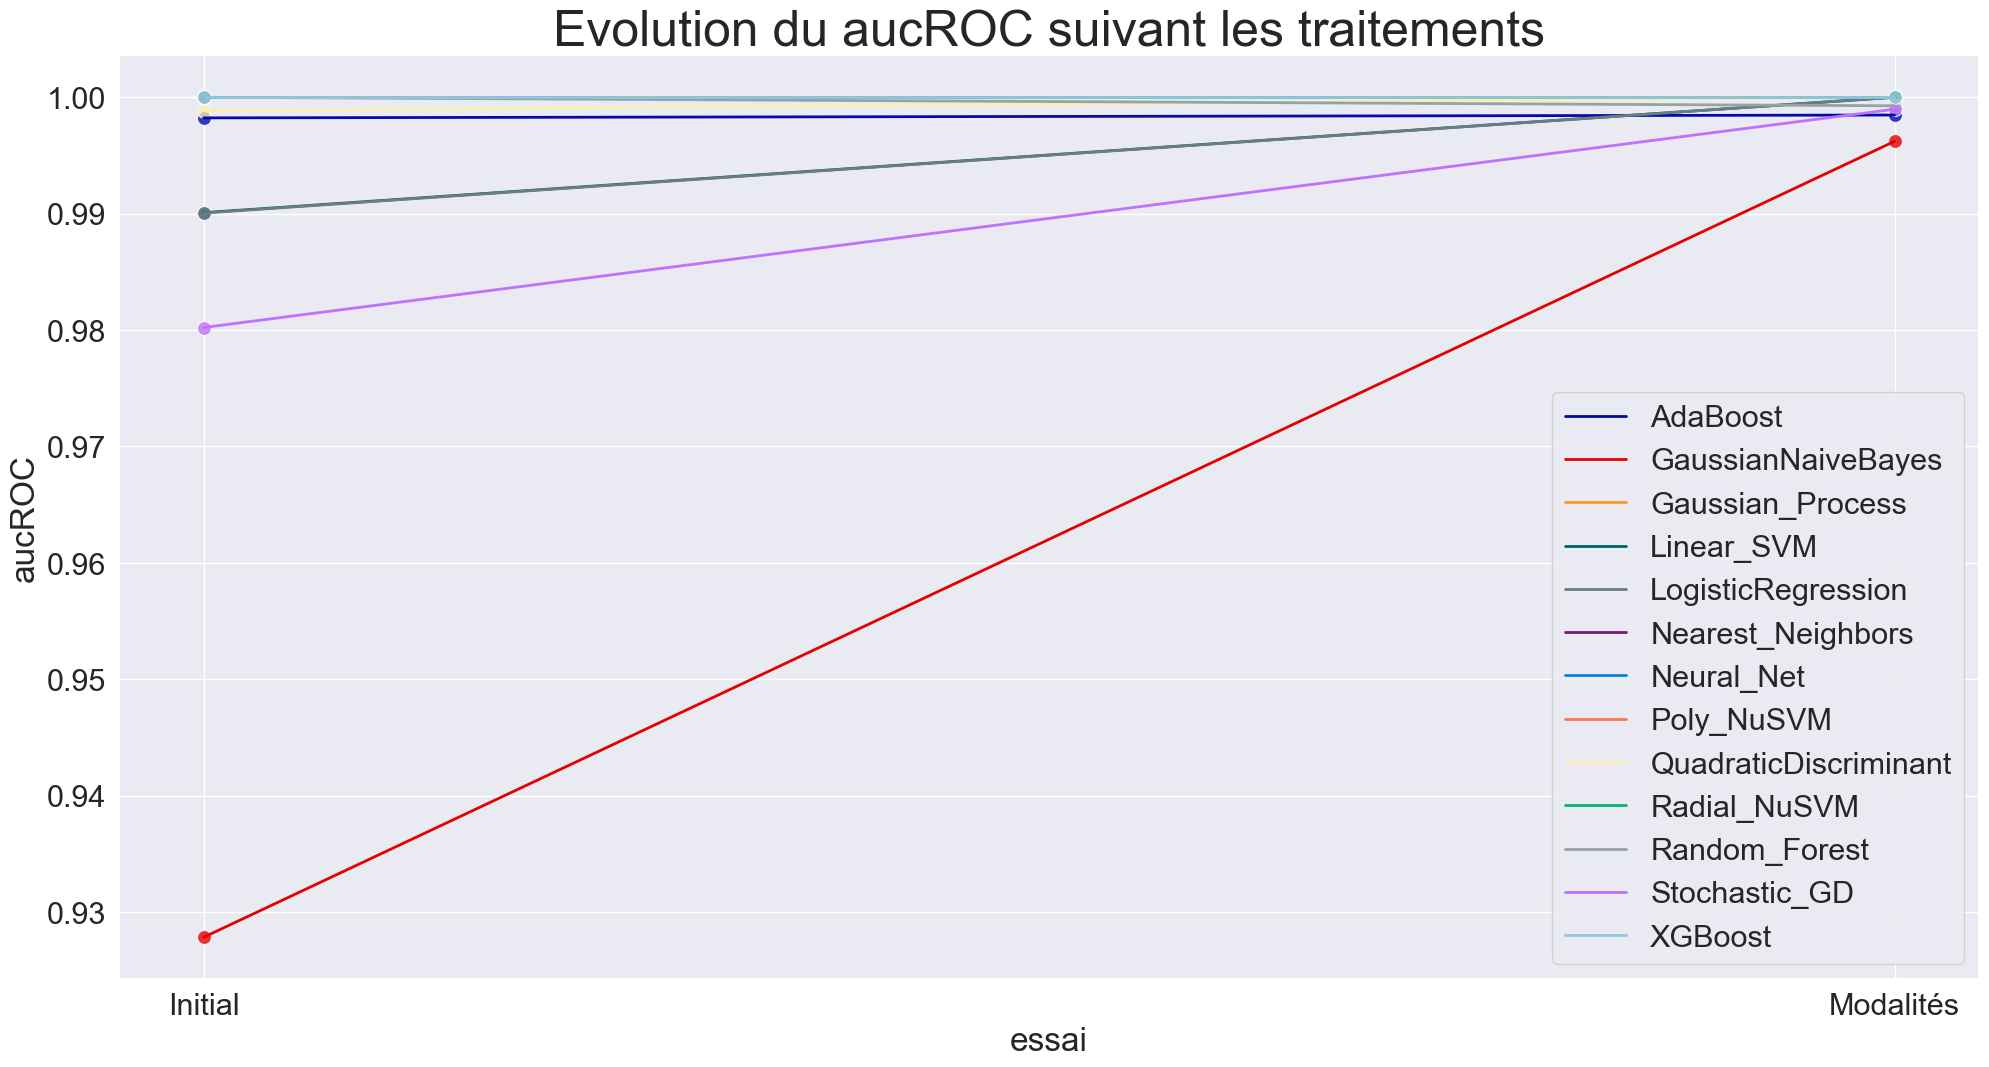

In [38]:
affichageEvolutionMetriques(resultats, metrique='aucROC', palette=palette)